<a href="https://colab.research.google.com/github/rishiguptha54/emotion_detecion_analysis_models/blob/main/textEmotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

import nltk
import re

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

import tensorflow as tf
import keras
# Import Tokenizer from tensorflow.keras.preprocessing.text instead of keras.preprocessing.text
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences,to_categorical
from keras.models import Sequential
from keras.layers import Dense,Embedding,SimpleRNN,LSTM,GRU,Bidirectional

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!unzip "/content/archive (4).zip"

Archive:  /content/archive (4).zip
  inflating: test.csv                
  inflating: training.csv            
  inflating: validation.csv          


In [ ]:
train_data = pd.read_csv("/content/training.csv") # Importing the train dataset
test_data = pd.read_csv("/content/test.csv")   # Importing the test dataset
validation_data = pd.read_csv("/content/validation.csv")  # Importing the validation dataset

In [ ]:
print("Train Data shape: ",train_data.shape) #Printing the shape train data
print("Test Data shape: ",test_data.shape) #Printing the shape test data
print("Validation Data shape: ",validation_data.shape) #Printing the shape validation data

Train Data shape:  (16000, 2)
Test Data shape:  (2000, 2)
Validation Data shape:  (2000, 2)


In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB
None


In [ ]:
print(train_data.describe())

              label
count  16000.000000
mean       1.565937
std        1.501430
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        5.000000


In [ ]:
print(train_data.describe(include = 'O'))

                                                     text
count                                               16000
unique                                              15969
top     im still not sure why reilly feels the need to...
freq                                                    2


In [ ]:
train_data['label'].value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


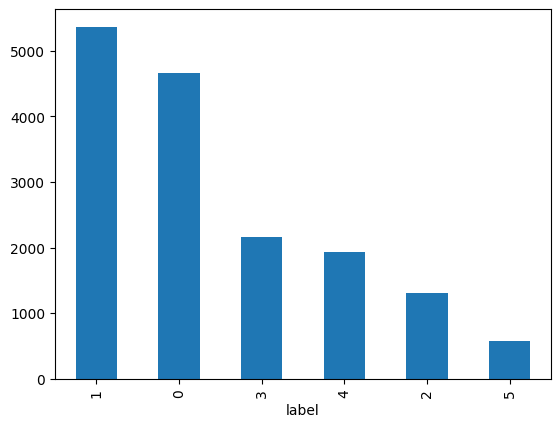

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')
plt.show()


In [ ]:
print("The Null value rows present in the trianing dataset is : ",train_data.isna().sum())
print("The Duplicate rows present in the training dataset is : ",train_data.duplicated().sum())

The Null value rows present in the trianing dataset is :  text     0
label    0
dtype: int64
The Duplicate rows present in the training dataset is :  1


In [ ]:
train_data.drop_duplicates(keep = 'first',inplace=True)

In [ ]:
print("Now the Duplicate rows present in the training dataset is : ",train_data.duplicated().sum())
print("Now the shape of the training dataset is ",train_data.shape)

Now the Duplicate rows present in the training dataset is :  0
Now the shape of the training dataset is  (15999, 2)


In [ ]:
nltk.download('stopwords')
pattern = re.compile('<.*?>')
punctuation = string.punctuation
ps = PorterStemmer()
tokenizer = Tokenizer()

def text_preprocess(text):

  text = re.sub(pattern,'',text)

  text = text.lower()

  text = text.translate(str.maketrans('','',punctuation))

  text = text.split()

  text = [ps.stem(word) for word in text if word not in stopwords.words('english')]

  return ' '.join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
processed_train_data = [text_preprocess(words) for words in train_data['text']]
processed_validation_data = [text_preprocess(words) for words in validation_data['text']]
processed_test_data = [text_preprocess(words) for words in test_data['text']]

In [ ]:
whole_text = ''

for i in processed_train_data:
  whole_text = whole_text + i


tokenizer.fit_on_texts([whole_text])
print(len(tokenizer.word_index))

20360


In [ ]:
x_train_sequences = []

for i in processed_train_data:
  x_train_sequences.append(tokenizer.texts_to_sequences([i])[0])

x_train_padseq = pad_sequences(x_train_sequences,maxlen = 50, padding = 'post')
x_train = np.array(x_train_padseq)
y_train = np.array(to_categorical(train_data['label']))

In [ ]:
x_validation_sequences = []

for i in processed_validation_data:
  x_validation_sequences.append(tokenizer.texts_to_sequences([i])[0])

x_validation_padseq = pad_sequences(x_validation_sequences,maxlen = 50, padding = 'post')    # Each sequences are padded to have equal size.

x_validation = np.array(x_validation_padseq)
y_validation = np.array(to_categorical(validation_data['label']))

In [ ]:
x_test_sequences = []

for i in processed_test_data:
  x_test_sequences.append(tokenizer.texts_to_sequences([i])[0])

x_test_padseq = pad_sequences(x_test_sequences,maxlen = 50, padding = 'post')
x_test = np.array(x_test_padseq)
y_test = np.array(test_data['label'])

In [ ]:
vocab_size = 20360
dim = 50
sent_length = 50

Bi-LSTM

In [ ]:
bidirectional_lstm_model = Sequential()

bidirectional_lstm_model.add(Embedding(input_dim=vocab_size, output_dim=dim, input_length=sent_length))
bidirectional_lstm_model.add(Bidirectional(LSTM(100)))
bidirectional_lstm_model.add(Dense(6, activation='softmax'))

bidirectional_lstm_model.build(input_shape=(None, sent_length))

bidirectional_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

bidirectional_lstm_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 50, 50)              │       1,018,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 200)                 │         120,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │           1,206 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,140,006 (4.35 MB)

 Trainable params: 1,140,006 (4.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
bidirectional_lstm_model_history = bidirectional_lstm_model.fit(x = x_train, y = y_train, validation_data = (x_validation,y_validation), epochs = 5, batch_size = 32)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 87ms/step - accuracy: 0.4423 - loss: 1.4067 - val_accuracy: 0.7585 - val_loss: 0.7124
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.8510 - loss: 0.4243 - val_accuracy: 0.8580 - val_loss: 0.3990
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.9442 - loss: 0.1615 - val_accuracy: 0.8750 - val_loss: 0.3516
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.9601 - loss: 0.1048 - val_accuracy: 0.8745 - val_loss: 0.3618
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.9740 - loss: 0.0741 - val_accuracy: 0.8800 - val_loss: 0.4159


LSTM


In [ ]:
lstm_model = Sequential()

lstm_model.add(Embedding(input_dim=vocab_size, output_dim=dim, input_length=sent_length))
lstm_model.add(LSTM(100, activation='relu'))
lstm_model.add(Dense(6, activation='softmax'))

lstm_model.build(input_shape=(None, sent_length))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 50, 50)              │       1,018,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             606 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,079,006 (4.12 MB)

 Trainable params: 1,079,006 (4.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lstm_model_history = lstm_model.fit(x = x_train, y = y_train, validation_data = (x_validation,y_validation), epochs = 5, batch_size = 32)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.3231 - loss: 63.3134 - val_accuracy: 0.3520 - val_loss: 1.5839
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.3332 - loss: 1.5690 - val_accuracy: 0.3520 - val_loss: 1.5321
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.3404 - loss: 1.4461 - val_accuracy: 0.6330 - val_loss: 1.0425
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.4510 - loss: 1.5229 - val_accuracy: 0.6120 - val_loss: 1.0229
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.6841 - loss: 0.8481 - val_accuracy: 0.7350 - val_loss: 0.8429


GRU

In [ ]:
gru_model = Sequential()

gru_model.add(Embedding(input_dim=vocab_size, output_dim=dim, input_length=sent_length))
gru_model.add(GRU(100))
gru_model.add(Dense(6, activation='softmax'))

gru_model.build(input_shape=(None, sent_length))

gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

gru_model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 50, 50)              │       1,018,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 100)                 │          45,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             606 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,064,206 (4.06 MB)

 Trainable params: 1,064,206 (4.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
gru_model_history = gru_model.fit(x = x_train, y = y_train, validation_data = (x_validation,y_validation), epochs = 5, batch_size = 32)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - accuracy: 0.3264 - loss: 1.6019 - val_accuracy: 0.3520 - val_loss: 1.5842
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.3307 - loss: 1.5659 - val_accuracy: 0.3520 - val_loss: 1.5820
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.3393 - loss: 1.5724 - val_accuracy: 0.3520 - val_loss: 1.5864
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - accuracy: 0.3322 - loss: 1.5791 - val_accuracy: 0.3520 - val_loss: 1.5841
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.3352 - loss: 1.5836 - val_accuracy: 0.3520 - val_loss: 1.5815


Bi-GRU

In [ ]:
bidirectional_gru_model = Sequential()

bidirectional_gru_model.add(Embedding(input_dim=vocab_size, output_dim=dim, input_length=sent_length))
bidirectional_gru_model.add(Bidirectional(GRU(100)))
bidirectional_gru_model.add(Dense(6, activation='softmax'))

bidirectional_gru_model.build(input_shape=(None, sent_length))

bidirectional_gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

bidirectional_gru_model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 50, 50)              │       1,018,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 200)                 │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │           1,206 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,110,406 (4.24 MB)

 Trainable params: 1,110,406 (4.24 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
bidirectional_gru_model_history = bidirectional_gru_model.fit(x = x_train, y = y_train, validation_data = (x_validation,y_validation), epochs = 5, batch_size = 32)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 53s 97ms/step - accuracy: 0.4458 - loss: 1.3978 - val_accuracy: 0.7425 - val_loss: 0.6832
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 94ms/step - accuracy: 0.8358 - loss: 0.4622 - val_accuracy: 0.8800 - val_loss: 0.3596
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 96ms/step - accuracy: 0.9377 - loss: 0.1801 - val_accuracy: 0.8900 - val_loss: 0.3068
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 99ms/step - accuracy: 0.9626 - loss: 0.1078 - val_accuracy: 0.9010 - val_loss: 0.2983
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 79s 93ms/step - accuracy: 0.9722 - loss: 0.0749 - val_accuracy: 0.8805 - val_loss: 0.3530


Stack GRU

In [ ]:
stack_gru_model = Sequential()

stack_gru_model.add(Embedding(input_dim=vocab_size, output_dim=dim, input_length=sent_length))
stack_gru_model.add(GRU(100, return_sequences=True))
stack_gru_model.add(GRU(100, return_sequences=True))
stack_gru_model.add(GRU(50))
stack_gru_model.add(Dense(6, activation='softmax'))

stack_gru_model.build(input_shape=(None, sent_length))

stack_gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

stack_gru_model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 50, 50)              │       1,018,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 50, 100)             │          45,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50, 100)             │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ (None, 50)                  │          22,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             306 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,147,306 (4.38 MB)

 Trainable params: 1,147,306 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
stack_gru_model_history = stack_gru_model.fit(x = x_train, y = y_train, validation_data = (x_validation,y_validation), epochs = 5, batch_size = 32)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 77s 140ms/step - accuracy: 0.3281 - loss: 1.6009 - val_accuracy: 0.3520 - val_loss: 1.5828
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 142ms/step - accuracy: 0.3375 - loss: 1.5810 - val_accuracy: 0.3520 - val_loss: 1.5816
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 141ms/step - accuracy: 0.3387 - loss: 1.5768 - val_accuracy: 0.3520 - val_loss: 1.5831
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 80s 138ms/step - accuracy: 0.3275 - loss: 1.5801 - val_accuracy: 0.3520 - val_loss: 1.5817
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 69s 138ms/step - accuracy: 0.3346 - loss: 1.5792 - val_accuracy: 0.3520 - val_loss: 1.5812


Metrics

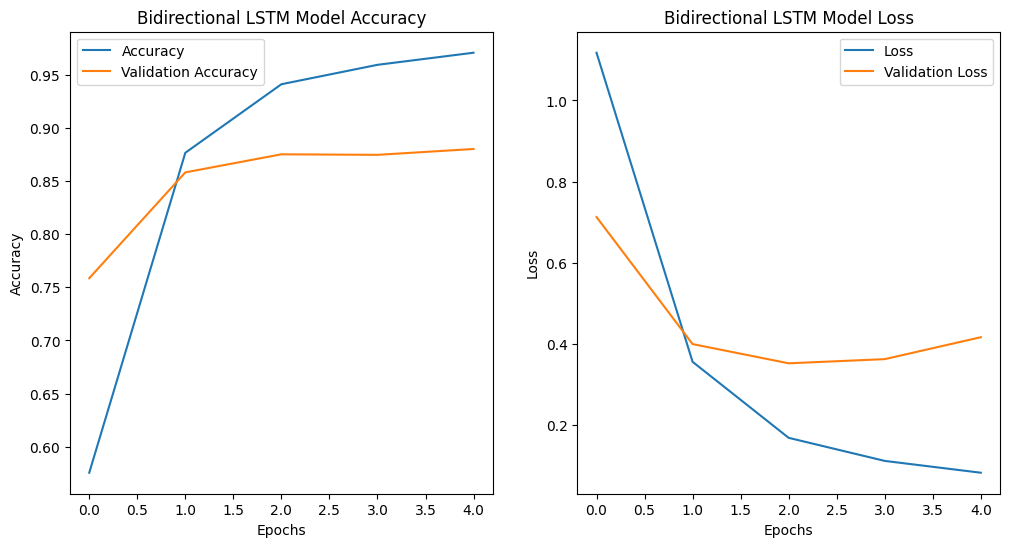

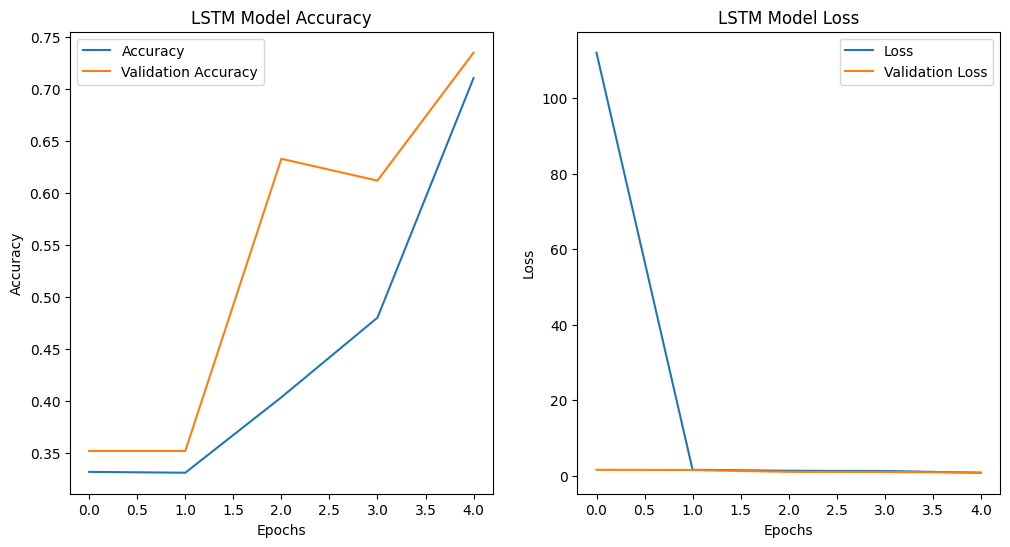

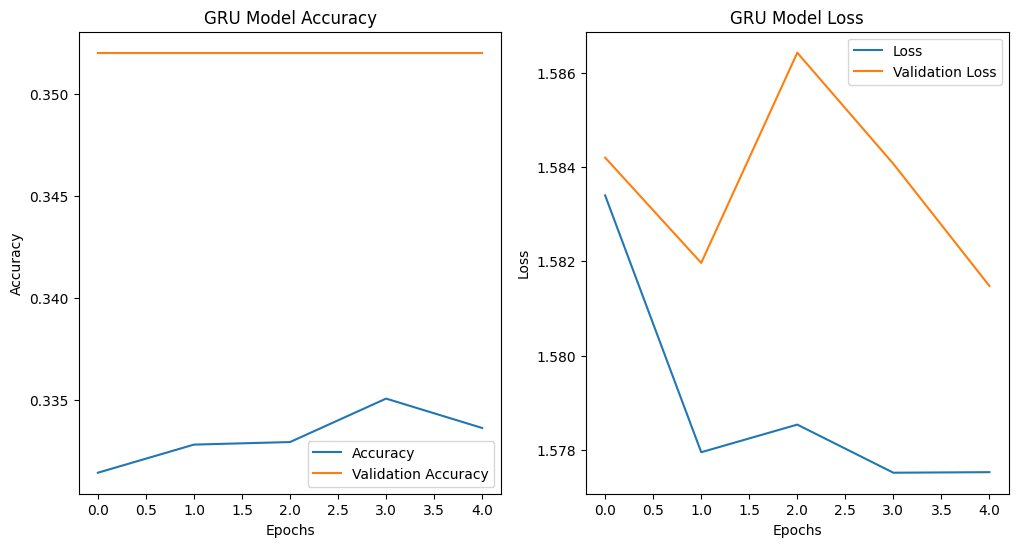

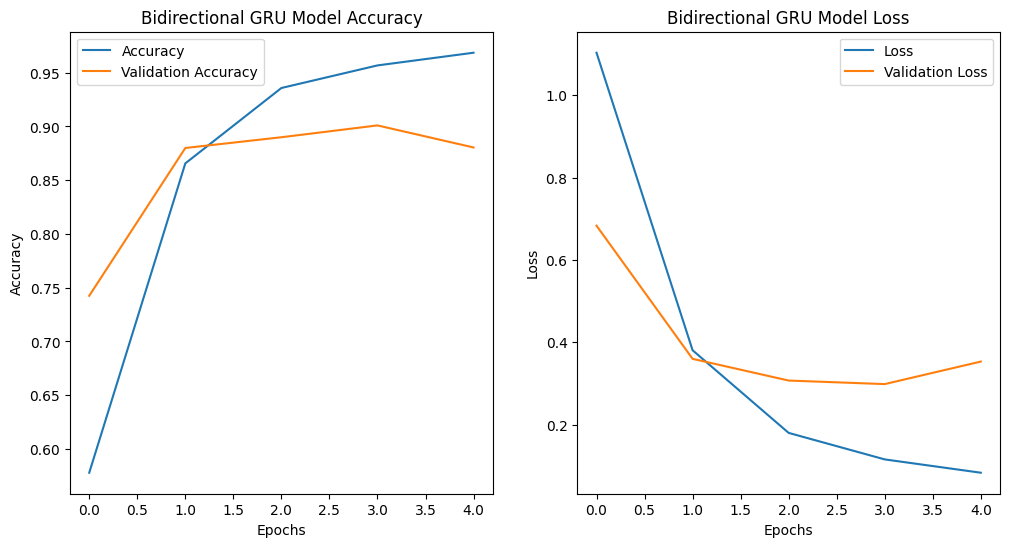

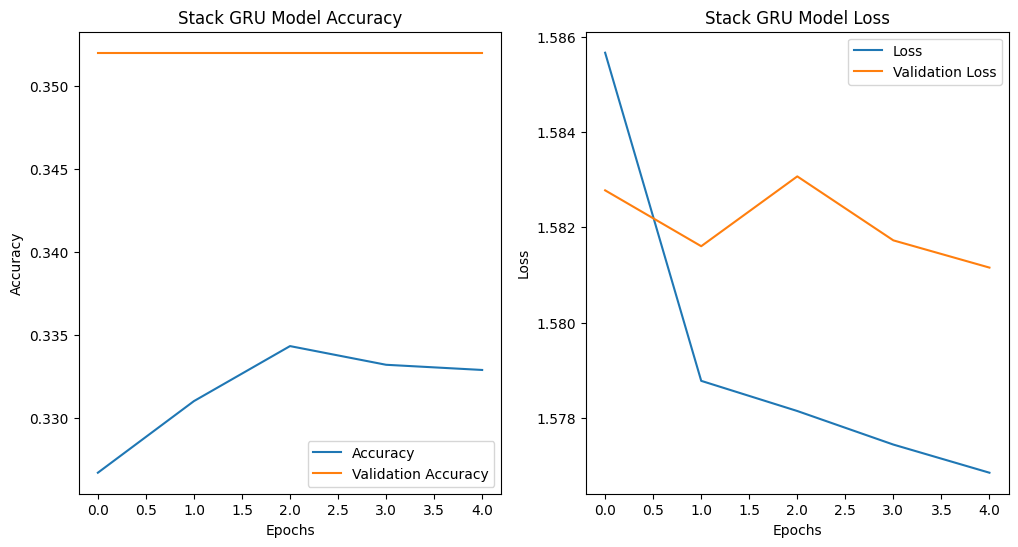

In [ ]:
plt.figure(figsize=(12,6))


# Plotting the accuracy plot of Bidirectional LSTM model
plt.subplot(1,2,1)
plt.title("Bidirectional LSTM Model Accuracy")
plt.plot(bidirectional_lstm_model_history.history['accuracy'],label='Accuracy')
plt.plot(bidirectional_lstm_model_history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


# Plotting the loss plot of Bidirectional LSTM model
plt.subplot(1,2,2)
plt.title("Bidirectional LSTM Model Loss")
plt.plot(bidirectional_lstm_model_history.history['loss'],label='Loss')
plt.plot(bidirectional_lstm_model_history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the accuracy plot of LSTM model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("LSTM Model Accuracy")
plt.plot(lstm_model_history.history['accuracy'],label='Accuracy')
plt.plot(lstm_model_history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plotting the loss plot of LSTM model
plt.subplot(1,2,2)
plt.title("LSTM Model Loss")
plt.plot(lstm_model_history.history['loss'],label='Loss')
plt.plot(lstm_model_history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



# Plotting the accuracy plot of GRU model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("GRU Model Accuracy")
plt.plot(gru_model_history.history['accuracy'],label='Accuracy')
plt.plot(gru_model_history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plotting the loss plot of GRU model
plt.subplot(1,2,2)
plt.title("GRU Model Loss")
plt.plot(gru_model_history.history['loss'],label='Loss')
plt.plot(gru_model_history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the accuracy plot of Bidirectional GRU model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Bidirectional GRU Model Accuracy")
plt.plot(bidirectional_gru_model_history.history['accuracy'],label='Accuracy')
plt.plot(bidirectional_gru_model_history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plotting the loss plot of Bidirectional GRU model
plt.subplot(1,2,2)
plt.title("Bidirectional GRU Model Loss")
plt.plot(bidirectional_gru_model_history.history['loss'],label='Loss')
plt.plot(bidirectional_gru_model_history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plotting the accuracy plot of Stack GRU model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Stack GRU Model Accuracy")
plt.plot(stack_gru_model_history.history['accuracy'],label='Accuracy')
plt.plot(stack_gru_model_history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plotting the loss plot of Stack GRU model
plt.subplot(1,2,2)
plt.title("Stack GRU Model Loss")
plt.plot(stack_gru_model_history.history['loss'],label='Loss')
plt.plot(stack_gru_model_history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#test data training
y_pred_bilstm = bidirectional_lstm_model.predict(x_test)
y_pred_lstm = lstm_model.predict(x_test)
y_pred_stackgru = stack_gru_model.predict(x_test)
y_pred_bigru = bidirectional_gru_model.predict(x_test)
y_pred_gru = gru_model.predict(x_test)


y_pred_bilstm = np.array([np.argmax(x) for x in y_pred_bilstm])
y_pred_lstm = np.array([np.argmax(x) for x in y_pred_lstm])
y_pred_stackgru = np.array([np.argmax(x) for x in y_pred_stackgru])
y_pred_bigru = np.array([np.argmax(x) for x in y_pred_bigru])
y_pred_gru = np.array([np.argmax(x) for x in y_pred_gru])

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [ ]:
result = {
    "Model Name": ['Bidirectional LSTM', "LSTM" ,"Bidirectional GRU", "GRU", "Stack GRU"],  # Fixed duplicate entry

    "Accuracy Score": [
        accuracy_score(y_test, y_pred_bilstm),
        accuracy_score(y_test, y_pred_lstm),

        accuracy_score(y_test, y_pred_bigru),
        accuracy_score(y_test, y_pred_gru),
        accuracy_score(y_test, y_pred_stackgru),
    ],

    "F1 Score(macro)": [
        f1_score(y_test, y_pred_bilstm, average='macro'),
        f1_score(y_test, y_pred_lstm, average='macro'),
        f1_score(y_test, y_pred_bigru, average='macro'),
        f1_score(y_test, y_pred_gru, average='macro'),
        f1_score(y_test, y_pred_stackgru, average='macro'),
    ],

    "Recall Score(macro)": [
        recall_score(y_test, y_pred_bilstm, average='macro'),
        recall_score(y_test, y_pred_lstm, average='macro'),
        recall_score(y_test, y_pred_bigru, average='macro'),
        recall_score(y_test, y_pred_gru, average='macro'),
        recall_score(y_test, y_pred_stackgru, average='macro'),
    ],

    "Precision Score(macro)": [
        precision_score(y_test, y_pred_bilstm, average='macro'),
        precision_score(y_test, y_pred_lstm, average='macro'),
        precision_score(y_test, y_pred_bigru, average='macro'),
        precision_score(y_test, y_pred_gru, average='macro'),
        precision_score(y_test, y_pred_stackgru, average='macro'),
    ],

    "F1 Score(micro)": [
        f1_score(y_test, y_pred_bilstm, average='micro'),
        f1_score(y_test, y_pred_lstm, average='micro'),
        f1_score(y_test, y_pred_bigru, average='micro'),
        f1_score(y_test, y_pred_gru, average='micro'),
        f1_score(y_test, y_pred_stackgru, average='micro'),
    ],

    "Recall Score(micro)": [
        recall_score(y_test, y_pred_bilstm, average='micro'),
        recall_score(y_test, y_pred_lstm, average='micro'),
        recall_score(y_test, y_pred_bigru, average='micro'),
        recall_score(y_test, y_pred_gru, average='micro'),
        recall_score(y_test, y_pred_stackgru, average='micro'),
    ],

    "Precision Score(micro)": [
        precision_score(y_test, y_pred_bilstm, average='micro'),
        precision_score(y_test, y_pred_lstm, average='micro'),
        precision_score(y_test, y_pred_bigru, average='micro'),
        precision_score(y_test, y_pred_gru, average='micro'),
        precision_score(y_test, y_pred_stackgru, average='micro'),
    ],
}

result_df = pd.DataFrame(result)

result_df.to_excel("Report of Trained Model.xlsx")

display(result_df)

,Model Name,Accuracy Score,F1 Score(macro),Recall Score(macro),Precision Score(macro),F1 Score(micro),Recall Score(micro),Precision Score(micro)
0,Bidirectional LSTM,0.8755,0.827320,0.821809,0.835276,0.8755,0.8755,0.8755
1,LSTM,0.7435,0.571047,0.570994,0.590000,0.7435,0.7435,0.7435
2,Bidirectional GRU,0.8830,0.836985,0.839851,0.834929,0.8830,0.8830,0.8830
3,GRU,0.3475,0.085962,0.166667,0.057917,0.3475,0.3475,0.3475
4,Stack GRU,0.3475,0.085962,0.166667,0.057917,0.3475,0.3475,0.3475


In [ ]:
# Making a predictive function which takes the input as text and in output it provide the emotion of the text

def predict_emotion_of_text(text):

    processed_text = text_preprocess(text)
    text_to_sequence = tokenizer.texts_to_sequences([processed_text])[0]
    padded_sequence = pad_sequences([text_to_sequence],maxlen = 50, padding = 'post')

    prediction = bidirectional_gru_model.predict(padded_sequence)[0]    # We can use any model from  above like Bidirection LSTM, LSTM, Stack LSTM, GRU, Stack GRU Or Bidirectional GRU. As the accuracy of Bidirectional is more. So in this case I have Choose this model in predictive system.

    classes = ['sadness','joy','love','anger','fear','surprise']


    print("Input: ",text)
    print("Output: ",classes[np.argmax(prediction)])
    print("\n")

In [ ]:
# Testing our model output with my own custom data

predict_emotion_of_text("Today is a bad day for me")
predict_emotion_of_text("she always gets angry if she doesn't get her own way")
predict_emotion_of_text("I love myself")
predict_emotion_of_text("What a beautiful day ")
predict_emotion_of_text("That horror movie is so scary")
predict_emotion_of_text("Wow! what a lovely surprise")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Input:  Today is a bad day for me
Output:  sadness


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Input:  she always gets angry if she doesn't get her own way
Output:  anger


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Input:  I love myself
Output:  anger


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Input:  What a beautiful day 
Output:  anger


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Input:  That horror movie is so scary
Output:  fear


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Input:  Wow! what a lovely surprise
Output:  surprise


